#  Practical Machine Learning with Python from  the youtube channel sentdex <br />

"The goal is to break it down so much that it is panfully simple "


#### Episode:


* [Introdução a Regressão- Tutorial Prático de Machine Learning p.2:](https://www.youtube.com/watch?v=JcI5Vnw0b2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=2)


#### Objective: 

Learn about Practical Machine Learning with Python from Scratch with Python .



#### Introduction: 
The purpuse is to know how Machine Learning works at a very deep level, because trying to solve more complex problems is gonna require a deep understand of how things actually work.
We are gonna be doing this buy covering a variety of algorithms, so first we are gonna be covering regression when we are going to be movingitno classification with knearst-neighbors and support vector machines and then we are going to get into clustering with flat clustering, hierarchical clustering and then finally we will be getting  into deep learning with neural networks 

In each of the major algorithms, we are gonna cover theory, aplicattion and then we are gonna dive in deep into the inner workings of each of them

#### Introdução a Regressão

The idea of simple liner regression is to take continuous data and figure out a best fit line to that data 

In [54]:
import pandas as pd
import quandl,math,datetime
import numpy as np 
from sklearn.model_selection import cross_validate
from  sklearn import preprocessing, svm
from  sklearn.linear_model import LinearRegression 
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use('ggplot')
import datetime 
import pickle

In [4]:
df = quandl.get('WIKI/GOOGL')

In [5]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]
df['HL_PCT']= (df['Adj. High']-df['Adj. Low'])/ df['Adj. Low'] 
df['PCT_change'] =(df['Adj. Close']-df['Adj. Open'])/ df['Adj. Open'] 
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

#### Features and Labels :

In [51]:
forecast_col ='Adj. Close'

df.fillna(-99999, inplace =True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label']  = df[forecast_col].shift(-forecast_out)
df=df.dropna()

#### Regression Training and Testing

In [28]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(df['label'])
y = y[:-forecast_out]

In [30]:
X_train, X_test, y_train,y_test =train_test_split(X,y,test_size=0.2)

In [52]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Pickling:

In [56]:
#with open('linearregression.pickle','wb') as f:
    #pickle.dump(clf,f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [ ]:
accuracy  = clf.score(X_test,y_test)

#### Regression forecasting and predicting:

In [33]:
forecast_set =clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

In [50]:
df['Forecast'] = np.nan

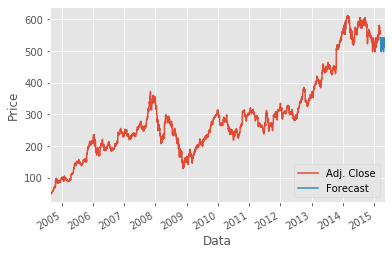

In [49]:
last_date =df.iloc[-1].name
last_unix =last_date.timestamp()
onde_day = 86400
next_unix = last_unix + onde_day

for i in forecast_set:
    next_date =datetime.datetime.fromtimestamp(next_unix)
    next_unix += onde_day
    df.loc[ next_date ] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()